In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
housing=pd.read_csv("C:\\Users\\RUKVITH\\Downloads\\housing.csv")

In [4]:
housing.shape

(20640, 10)

In [6]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


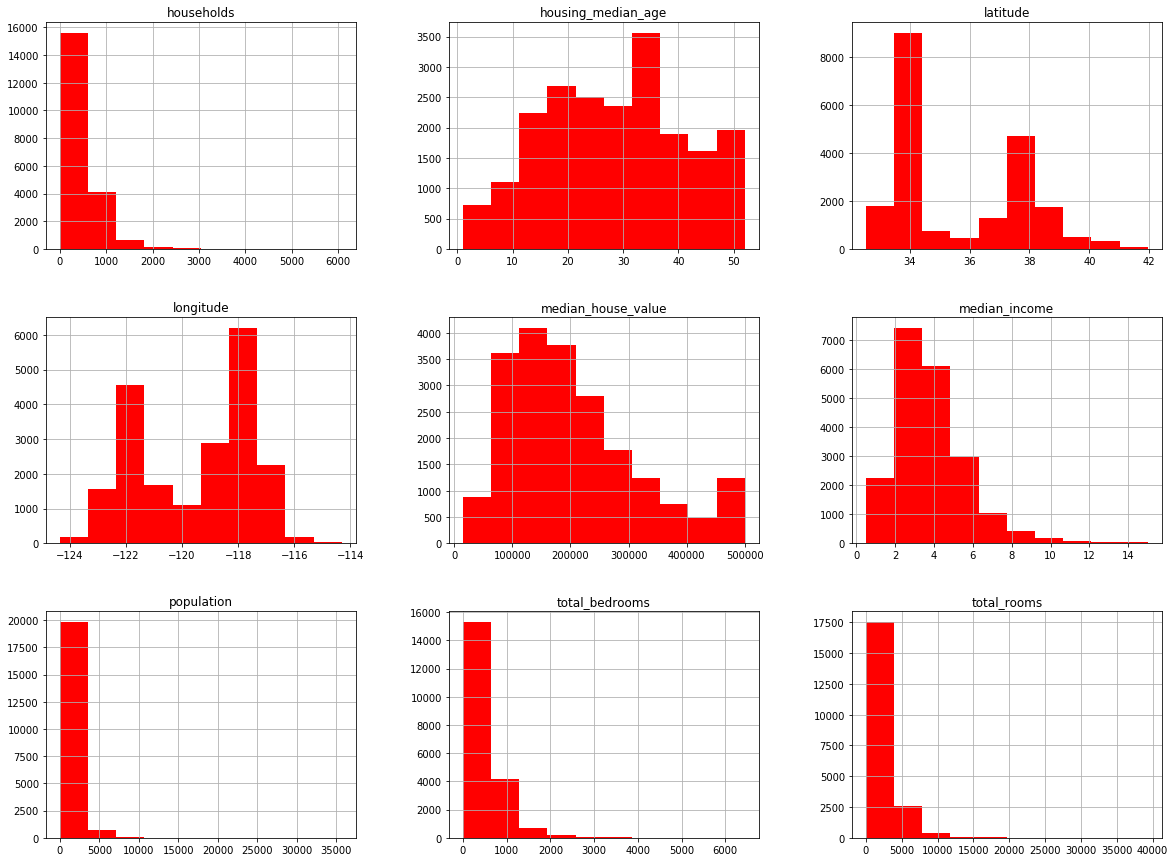

In [8]:
housing.hist(figsize=(20,15), color = 'red')
plt.show()

In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [11]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
np.mean(housing['total_bedrooms'])

537.8705525375618

In [13]:
housing=housing.dropna(axis=0)

In [14]:
print(housing.shape)

(20433, 10)


In [15]:
#housing['total_bedrooms'] = housing['total_bedrooms'].fillna(np.mean(housing['total_bedrooms']))

In [16]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [20]:
cat_var =housing.dtypes.loc[housing.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    housing[var] = le.fit_transform(housing[var])

In [21]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,3,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,3,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,3,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,3,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,3,261100


In [25]:
X = housing.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = housing['median_house_value']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, 
                                                     random_state = 45)

In [28]:
#Linear Regression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
prediction = lin.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, prediction)))
print(rmse)

70166.3884466549


In [35]:
#Decision Tree Regression
dtree_reg = DecisionTreeRegressor(max_depth=9)
dtree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
dt_prediction = dtree_reg.predict(X_test)
print("Root Mean Squared error = " + str(np.sqrt(mean_squared_error(y_test, dt_prediction))))
dt_accuracy = dtree_reg.score(X_test,y_test)
print("Accuracy = " + str(dt_accuracy*100))
print("R2 score = " + str(r2_score(y_test,dt_prediction)))

Root Mean Squared error = 62361.731688194246
Accuracy = 70.47396628112273
R2 score = 0.7047396628112272


In [38]:
#Random Forest Regression
rf = RandomForestRegressor(30)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
rf_prediction = rf.predict(X_test)
print("Root Mean Squared Error = " + str(np.sqrt(mean_squared_error(y_test,rf_prediction))))
rf_accuracy = rf.score(X_test,y_test)
print("Accuracy = " + str(rf_accuracy*100))
print("R2 score = " + str(r2_score(y_test,rf_prediction)))

Root Mean Squared Error = 49729.7712253532
Accuracy = 81.22405945795688
R2 score = 0.8122405945795689


In [43]:
#Bonus Exercise
x1 = housing.iloc[:, 7].values
y1 = housing.iloc[:, 9].values
#Spliting the dataset and Reshapping the data
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size= 0.2, random_state=2)
xtrain= xtrain.reshape(-1, 1)
ytrain= ytrain.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)

In [44]:
#linear Regression
rg = LinearRegression()
rg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
pred = rg.predict(xtest)
rms1 = np.sqrt(mean_squared_error(ytest,pred))
print("Root Mean Square Error = " + str(rms1))
accuracy1 = rg.score(xtest,ytest)
print("Accuracy = " + str(accuracy1*100))

Root Mean Square Error = 83723.69888227055
Accuracy = 45.339728251392316


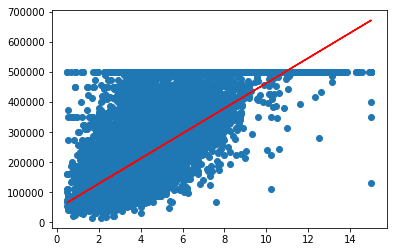

In [46]:
#Plot
plt.scatter(xtrain, ytrain)
plt.plot(xtest, pred, color='red')
plt.show()

Text(0, 0.5, 'Predicted median_house_value')

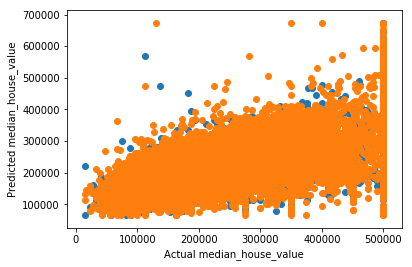

In [47]:
plt.scatter(ytest, pred)
plt.scatter(ytrain, rg.predict(xtrain))
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")